In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df=pd.read_csv("C:\\Users\\Dell\\Downloads\\datasets\\Loan_dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Looking for NaN values

In [33]:
df.isnull().mean()*100

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

In [34]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    str    
 1   Gender             356 non-null    str    
 2   Married            367 non-null    str    
 3   Dependents         357 non-null    str    
 4   Education          367 non-null    str    
 5   Self_Employed      344 non-null    str    
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    str    
dtypes: float64(3), int64(2), str(7)
memory usage: 34.5 KB


In [41]:
df=df.drop(columns=df.columns[df.isnull().sum()==0])
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            356 non-null    str    
 1   Dependents        357 non-null    str    
 2   Self_Employed     344 non-null    str    
 3   LoanAmount        362 non-null    float64
 4   Loan_Amount_Term  361 non-null    float64
 5   Credit_History    338 non-null    float64
dtypes: float64(3), str(3)
memory usage: 17.3 KB


Columns having nan values less than 5 percent 

In [35]:
cols=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['Gender', 'Dependents', 'LoanAmount', 'Loan_Amount_Term']

Percentage of data we will loose if we drop the nan rows of columns present in cols

In [36]:
data_lost=100-(len(df[cols].dropna())/len(df)*100)
print(data_lost,'%')

8.174386920980922 %


In [45]:
new_df=df[cols].dropna()
df.shape,new_df.shape

((367, 6), (337, 4))

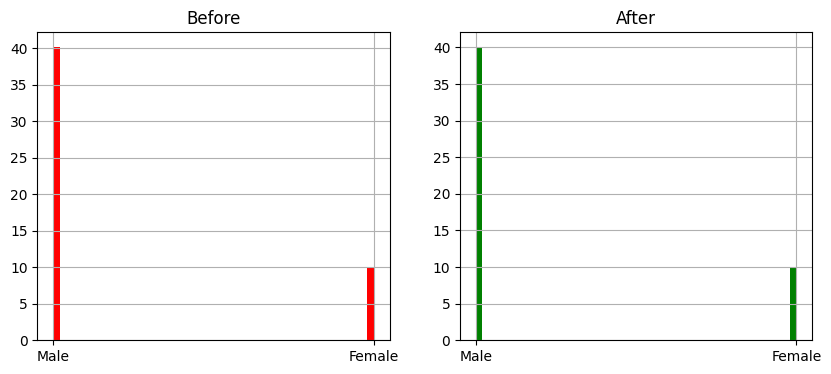

In [49]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
df['Gender'].hist(bins=50, ax=ax1, density=True, color='red')
ax1.set_title("Before")
ax2 = fig.add_subplot(122)
new_df['Gender'].hist(bins=50, ax=ax2, density=True, color='green')
ax2.set_title("After")
plt.show()

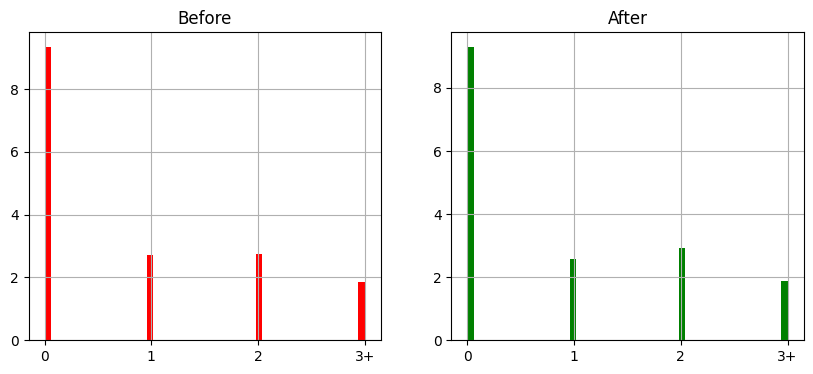

In [50]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
df['Dependents'].hist(bins=50, ax=ax1, density=True, color='red')
ax1.set_title("Before")
ax2 = fig.add_subplot(122)
new_df['Dependents'].hist(bins=50, ax=ax2, density=True, color='green')
ax2.set_title("After")
plt.show()

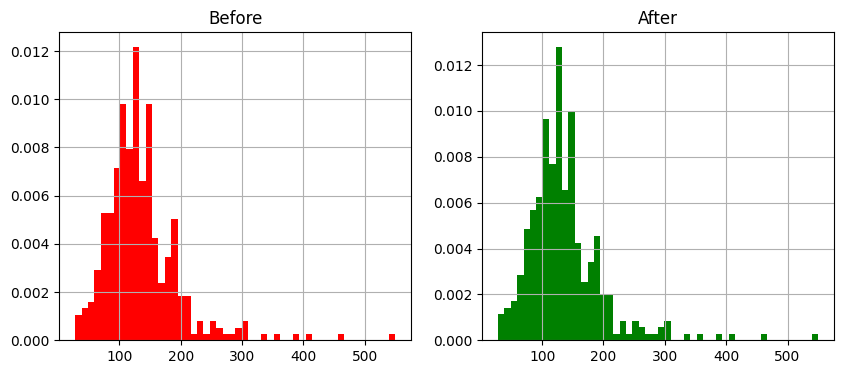

In [51]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
df['LoanAmount'].hist(bins=50, ax=ax1, density=True, color='red')
ax1.set_title("Before")
ax2 = fig.add_subplot(122)
new_df['LoanAmount'].hist(bins=50, ax=ax2, density=True, color='green')
ax2.set_title("After")
plt.show()

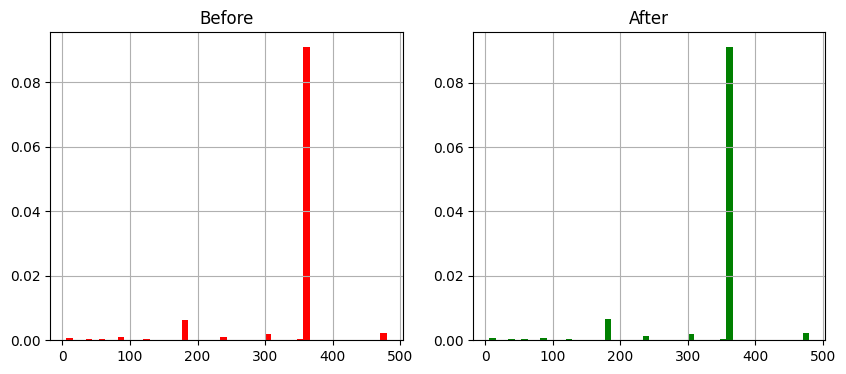

In [52]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
df['Loan_Amount_Term'].hist(bins=50, ax=ax1, density=True, color='red')
ax1.set_title("Before")
ax2 = fig.add_subplot(122)
new_df['Loan_Amount_Term'].hist(bins=50, ax=ax2, density=True, color='green')
ax2.set_title("After")
plt.show()

<Axes: ylabel='Density'>

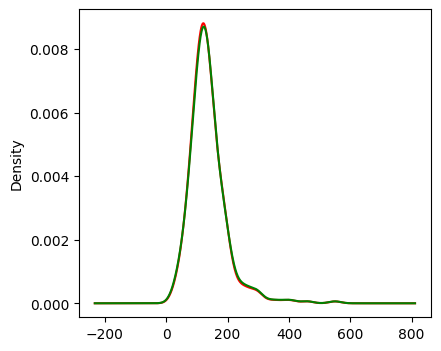

In [59]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
df['LoanAmount'].plot.density(color='red') #before
new_df['LoanAmount'].plot.density(color='green') #after

<Axes: ylabel='Density'>

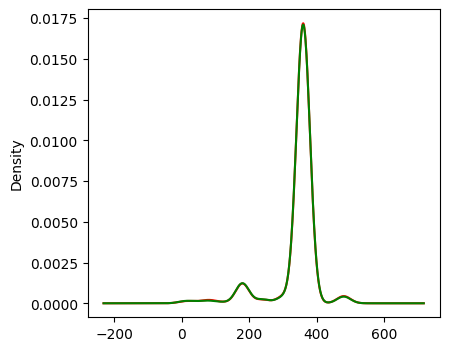

In [60]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
df['Loan_Amount_Term'].plot.density(color='red') #before
new_df['Loan_Amount_Term'].plot.density(color='green') #after